<a href="https://colab.research.google.com/github/surekhagm16/MLProjects/blob/main/handwrittendigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!pip install -U kaleido

In [144]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [145]:
#Load the data from Keras datasets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [146]:
#Analyse data
len(X_train), len(X_test), X_train.shape, X_train[0].shape

(60000, 10000, (60000, 28, 28), (28, 28))

In [147]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

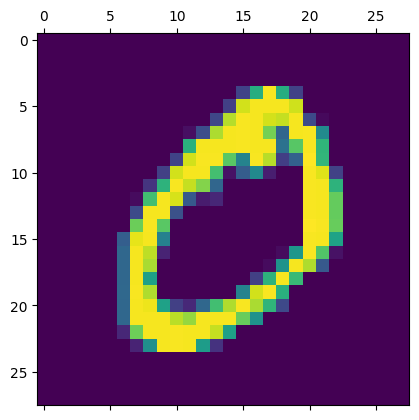

In [148]:
plt.matshow(X_train[1])

In [149]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [150]:
# flatten your data
X_train_flat = X_train.reshape(len(X_train),-1)
X_test_flat = X_test.reshape(len(X_test), -1)
X_train_flat.shape, X_test_flat.shape

((60000, 784), (10000, 784))

In [151]:
from tensorflow.keras.layers import Dense

In [152]:
model = tf.keras.Sequential([
    Dense(50, input_shape=(784,) ,activation='relu'),
    Dense(10, activation = 'linear')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer =tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              )

In [154]:
history = model.fit(X_train_flat, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6459 - loss: 6.2481
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8492 - loss: 0.5662
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9037 - loss: 0.3601
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9200 - loss: 0.2807
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9311 - loss: 0.2444
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9359 - loss: 0.2284
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9371 - loss: 0.2203
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9395 - loss: 0.2158
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9417 - loss: 0.2105
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9412 - loss: 0.2079


<Axes: >

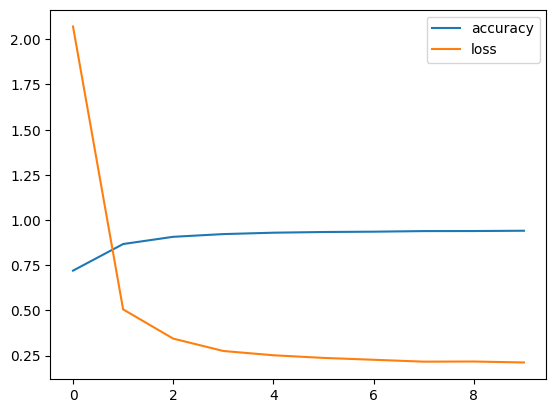

In [155]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [156]:
#Applying scaling to the data
X_train[0]
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [157]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

In [158]:
model1 = tf.keras.Sequential([
    Dense(50, activation = 'relu'),
    Dense(10, activation = 'relu' )
])


In [159]:
model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [160]:
history_model1 = model1.fit(X_train_flat, y_train, epochs = 10 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6171 - loss: 1.2047
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7337 - loss: 0.8856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7502 - loss: 0.8368
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7559 - loss: 0.8189
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7599 - loss: 0.8046
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7601 - loss: 0.7998
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7645 - loss: 0.7844
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7677 - loss: 0.7762
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7658 - loss: 0.7793
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7718 - loss: 0.7568


<Axes: >

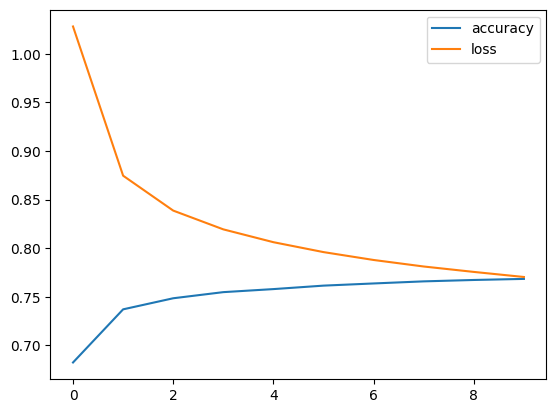

In [161]:
pd.DataFrame(history_model1.history).plot()

In [162]:
#Evaluate the model
model1.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7498 - loss: 0.8155


[0.8078528046607971, 0.7578999996185303]

In [163]:
#predict using the model built
y_preds1 = model1.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [164]:
#create a confusion matrix
y_preds1_label = [np.argmax(i) for i in y_preds1]
cm1 = tf.math.confusion_matrix(y_test, y_preds1_label)

Text(50.722222222222214, 0.5, 'Truth')

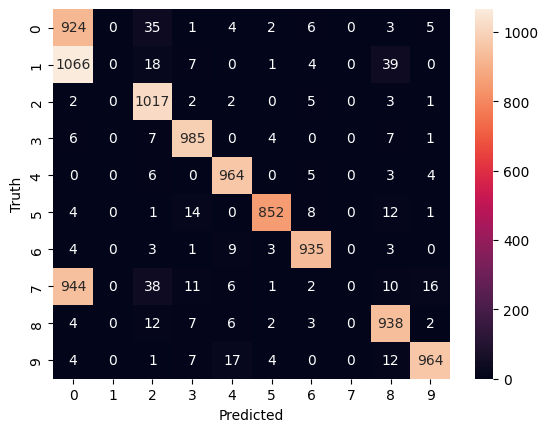

In [165]:
#plot the confusion matrix
import seaborn as sns
sns.heatmap(cm1, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

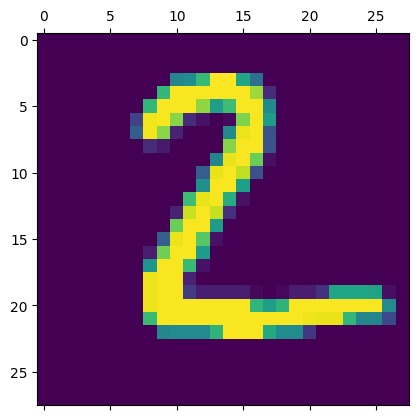

In [166]:
#manual check your predictions for a couple of input
plt.matshow(X_test[1])

In [167]:
y_preds1[1]

array([ 0.      ,  0.      , 14.371917,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ], dtype=float32)

In [168]:
np.argmax(y_preds1[1] )

np.int64(2)

In [169]:
y_test[2]

np.uint8(1)

In [170]:
# Using sigmoid activation

In [171]:
model2 = tf.keras.Sequential([
    Dense(50, activation = 'relu'),
    Dense(10, activation = 'sigmoid' )
])


In [172]:
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [173]:
history_model2 = model2.fit(X_train_flat, y_train, epochs = 10 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8477 - loss: 0.5528
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9508 - loss: 0.1712
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9643 - loss: 0.1193
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9718 - loss: 0.0956
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9771 - loss: 0.0791
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9806 - loss: 0.0657
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0585
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0520
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0458
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9891 - loss: 0.0377


In [174]:
y_preds2 = model2.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


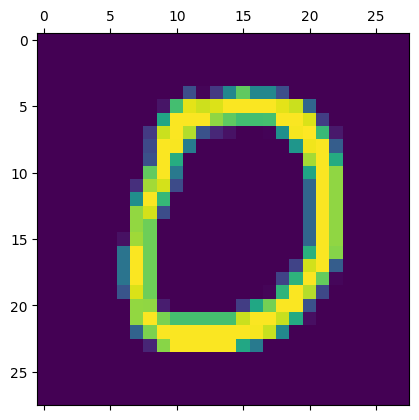

In [175]:
plt.matshow(X_test[10])

In [176]:
np.argmax(y_preds2[10])

np.int64(0)

In [177]:
y_pred_labels = [np.argmax(i) for i in y_preds2 ]


In [178]:
#Build confusion matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    3,    0,    0,    3,    1,    2,    0],
       [   0, 1121,    5,    2,    0,    1,    1,    2,    3,    0],
       [   5,    3, 1006,    8,    1,    0,    1,    2,    5,    1],
       [   0,    1,    3,  995,    1,    0,    0,    2,    6,    2],
       [   1,    1,    3,    1,  959,    0,    6,    4,    3,    4],
       [   4,    2,    1,   31,    3,  827,    6,    1,   16,    1],
       [   4,    3,    3,    1,    6,    2,  933,    1,    5,    0],
       [   2,    2,    9,    9,    2,    0,    0,  994,    2,    8],
       [   4,    0,    2,   12,    4,    0,    3,    0,  947,    2],
       [   1,    2,    1,   12,   21,    3,    1,    6,    9,  953]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

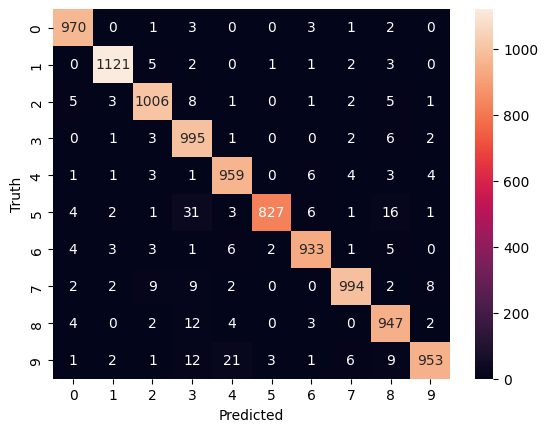

In [179]:
#plot confusion matrix

import seaborn as sns
sns.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a model using keras flattening

In [180]:
X_train.shape

(60000, 28, 28)

In [181]:
from tensorflow.keras import layers

In [182]:
model3 = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(50,activation='relu'),
    layers.Dense(10, activation = 'linear')

])

In [183]:
model3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer = tf.keras.optimizers.Adam(),
               metrics =['accuracy'])


In [184]:
history_model3 = model3.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8455 - loss: 0.5364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9504 - loss: 0.1734
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9637 - loss: 0.1236
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9703 - loss: 0.1004
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.0789
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9795 - loss: 0.0670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0575
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0517
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0455
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9882 - loss: 0.0384


In [185]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9707 - loss: 0.1064


[0.09233737736940384, 0.9750999808311462]

In [186]:
y_preds3 = model3.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

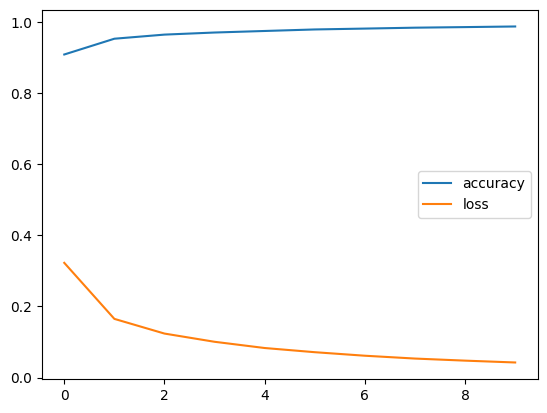

In [187]:
#plot loss function
pd.DataFrame(history_model3.history).plot()

In [188]:
#Create a confusion matrix for model3

In [189]:
y_preds3_label = [np.argmax(i) for i in y_preds3]
cm = tf.math.confusion_matrix(y_test, y_preds3_label)

Text(0.5, 1.0, 'Confusion Matrix for model3')

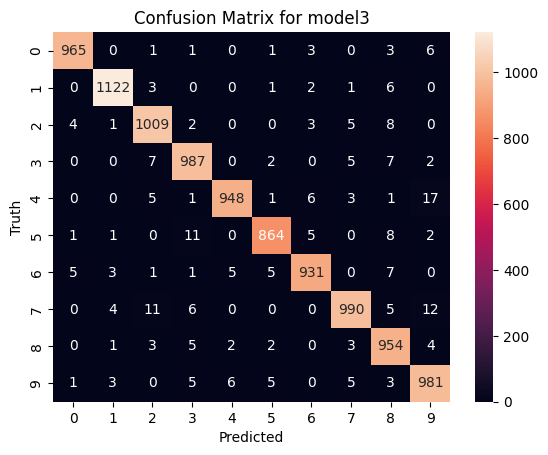

In [190]:
#plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for model3')